#Import các thư viện cần thiết

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
import numpy.linalg as nla

#Lấy dataset MNIST từ thư viện scikit-learn
Tập dữ liệu $x_1,x_2,\ldots,x_n$

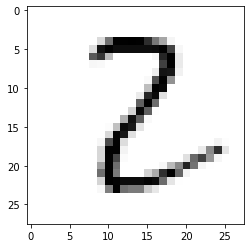

In [ ]:
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
n = 2000
np.random.seed(15)

# chọn ngẫu nhiên 2000 chữ số viết tay từ dataset MNIST
data = X[np.random.choice(int(X.shape[0]), n), :]/255.

n_clusters = 10

#plot số ngẫu nhiên từ MNIST
digit = data[0,:]
digit = np.reshape(digit, (28,28))
pyplot.imshow(digit, cmap='Greys')
pyplot.show()

#Similarity function

Ta sử dụng Gaussian similarity function để tượng trưng cho mức độ giống nhau giữa các chữ số:

$$ s(x_i, x_j) = \exp\left(- \frac{||x_i - x_j||^2}{2\sigma^2}\right) $$

In [ ]:
sigma = 100.0

def similarity(x_i, x_j):
    return np.exp(-nla.norm(x_i - x_j)**2.0 / (2.0*sigma**2.0))

# Dựng similarity graph
w = np.zeros((n, n))
for i in range(n):
    for j in range(i, n):
        w[i,j] = similarity(data[i,:], data[j,:])
        w[j,i] = w[i,j]

#Dựng ma trận Laplace và tính các giá trị riêng

Smallest eigenvalues = [-8.17275276e-13  1.98150218e+03  1.98324577e+03  1.98333319e+03
  1.98345702e+03  1.98355596e+03  1.98359515e+03  1.98412035e+03
  1.98430747e+03  1.98431119e+03  1.98453831e+03  1.98457477e+03
  1.98474487e+03  1.98477151e+03  1.98478762e+03  1.98482364e+03
  1.98483153e+03  1.98483526e+03  1.98486696e+03  1.98499161e+03]


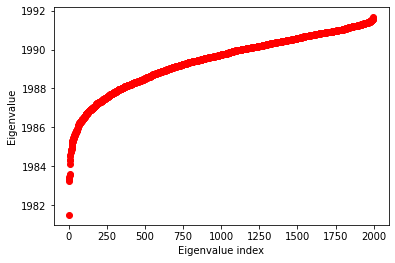

In [ ]:
L = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if (i != j):
            L[i][j] = -w[i][j]
            L[i][i] += w[i][j]

evals,evecs = nla.eigh(L)

print('Smallest eigenvalues = {}'.format(evals[:2*n_clusters]))

pyplot.plot(evals[1:], 'ro', linewidth = 0.1)
pyplot.xlabel('Eigenvalue index')
pyplot.ylabel('Eigenvalue')

pyplot.show()

#Áp dụng Spectral clustering

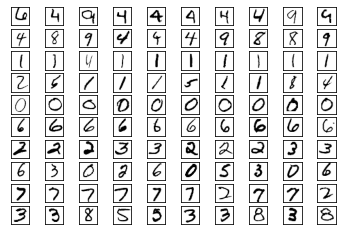

In [ ]:
sc = SpectralClustering(n_clusters=n_clusters,gamma = 1/(2*sigma**2)).fit(data)

#tạo list index cho từng cluster
sc_points = []
for ind in range(10):
    tmp_list = []
    for i in range(n):
        if (sc.labels_[i] == ind):
            tmp_list.append(i)
    sc_points.append(tmp_list)


#plot kết quả
n_cols = 10
ind_subplot = 1
for ind_cluster in range(n_clusters):
    for ind_col in range(n_cols):
        pyplot.subplot(n_clusters, n_cols, ind_subplot)
        
        ind_point = sc_points[ind_cluster][ind_col]
        digit = data[ind_point, :]
        digit = np.reshape(digit, (28,28))
        
        pyplot.imshow(digit, cmap='Greys')
        
        frame1 = pyplot.gca()
        frame1.axes.xaxis.set_visible(False)
        frame1.axes.yaxis.set_visible(False)
        
        ind_subplot += 1
        
pyplot.show()